In [113]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [114]:
pd.set_option("max_rows", 25)

In [115]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [116]:
data_path = '/home/achara/data/achara/'

In [117]:
df = pd.read_csv(data_path + 'final_vp_data_2017_to_2019.csv')

In [118]:
df.head()

,DateTime,SensorDepth_Water_EXO,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,...,day,year,SolarRad_Air_LiCor,TP,TSP,SRP,TN,NO3,NH4,PP
0,10/1/2017,1.01,0.1556,0.358058,9.17,101.610000,139.810000,20.380000,8.010344,0.880,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
1,10/1/2017,1.03,0.1520,0.544445,9.18,101.776667,139.786667,20.386667,8.027139,0.862,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
2,10/1/2017,1.05,0.1304,0.843708,9.16,101.230000,139.660000,20.220000,8.019958,0.844,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
3,10/1/2017,1.07,0.1592,0.939807,9.16,101.590000,139.780000,20.410000,8.038803,0.826,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741
4,10/1/2017,1.09,0.1340,0.797623,9.15,101.490000,139.750000,20.420000,8.024188,0.835,...,1,2017,127.38941,25.691678,9.009938,5.594708,0.498284,0.191,0.005,16.681741


## Exploring our target variable `PC_Water_EXO`

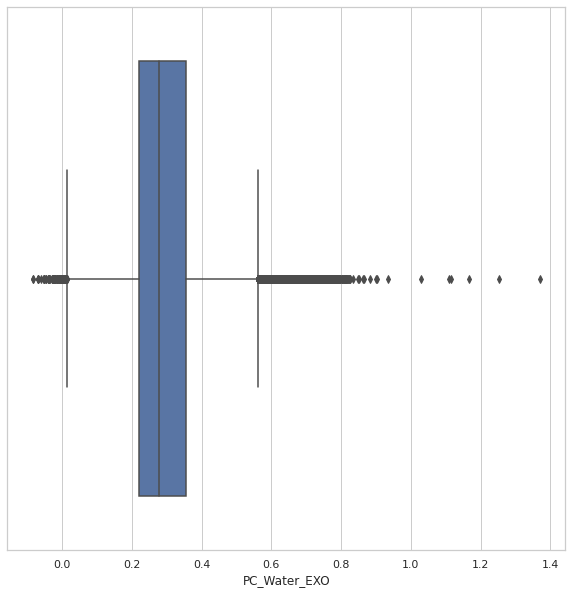

In [119]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='PC_Water_EXO', orient='h')
plt.show()

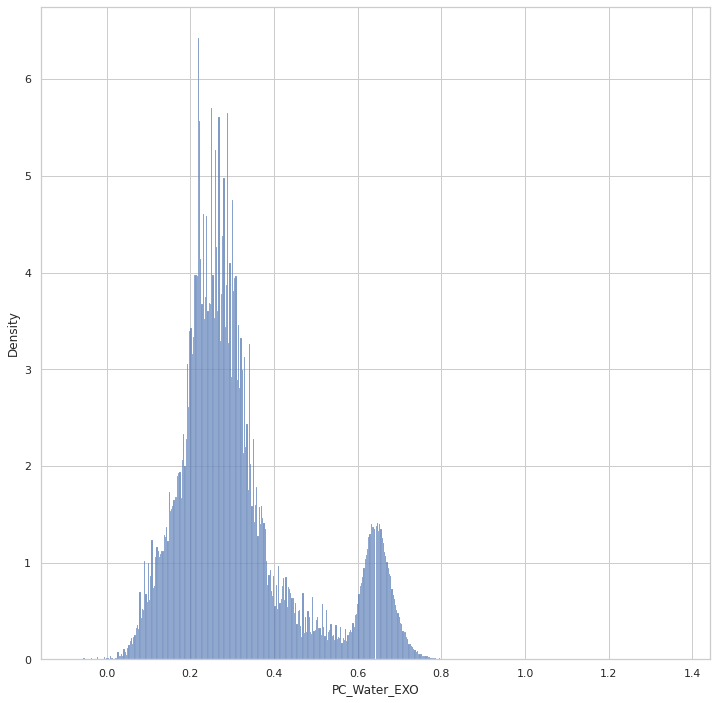

In [120]:
plt.figure(figsize=(12, 12))
sns.histplot(data=df, x='PC_Water_EXO', stat='density', bins=500)
plt.show()

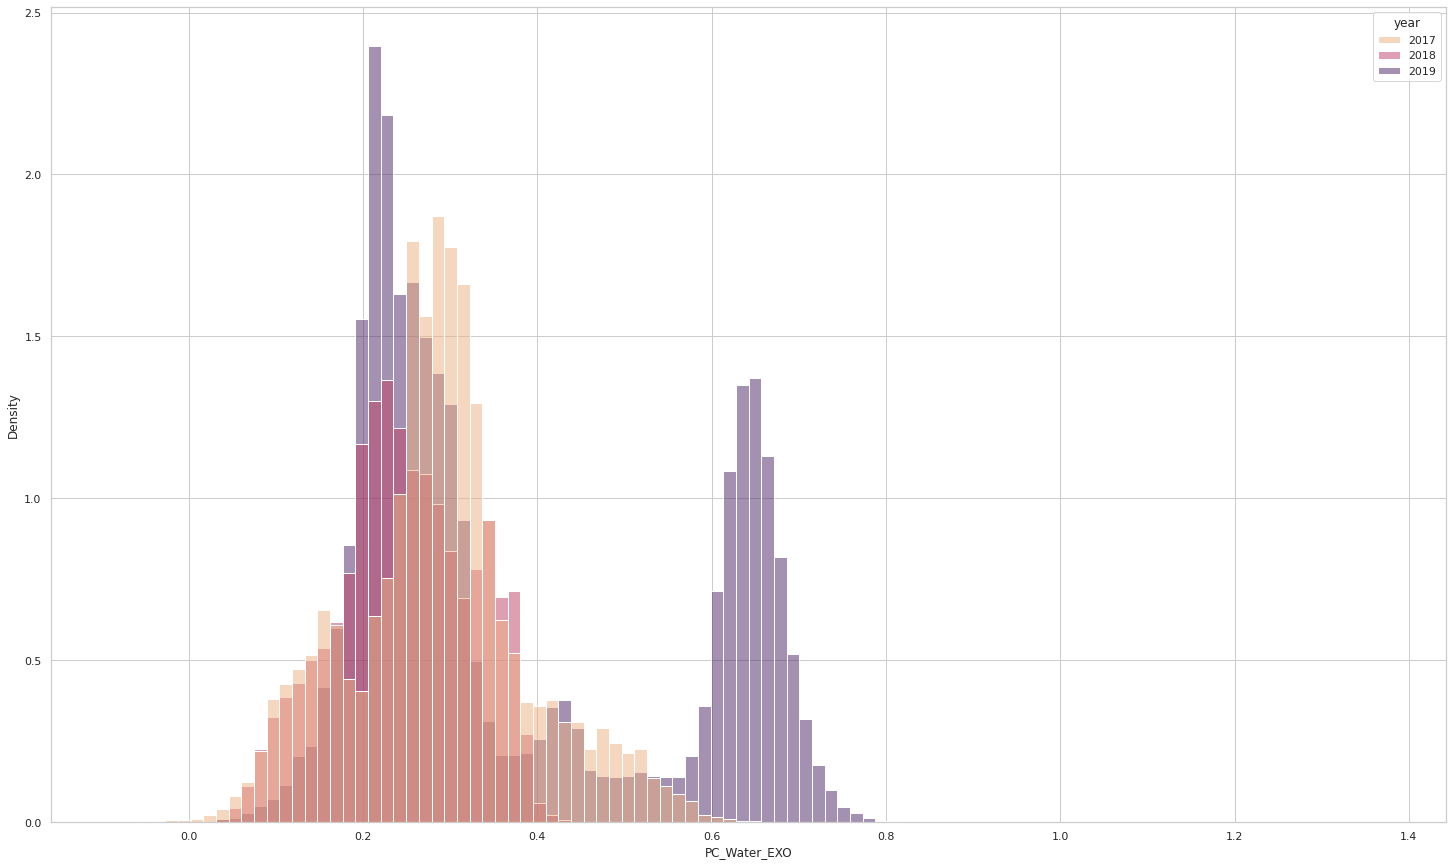

In [121]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df, x='PC_Water_EXO', stat='density', bins=100, hue='year', palette='flare')
plt.show()

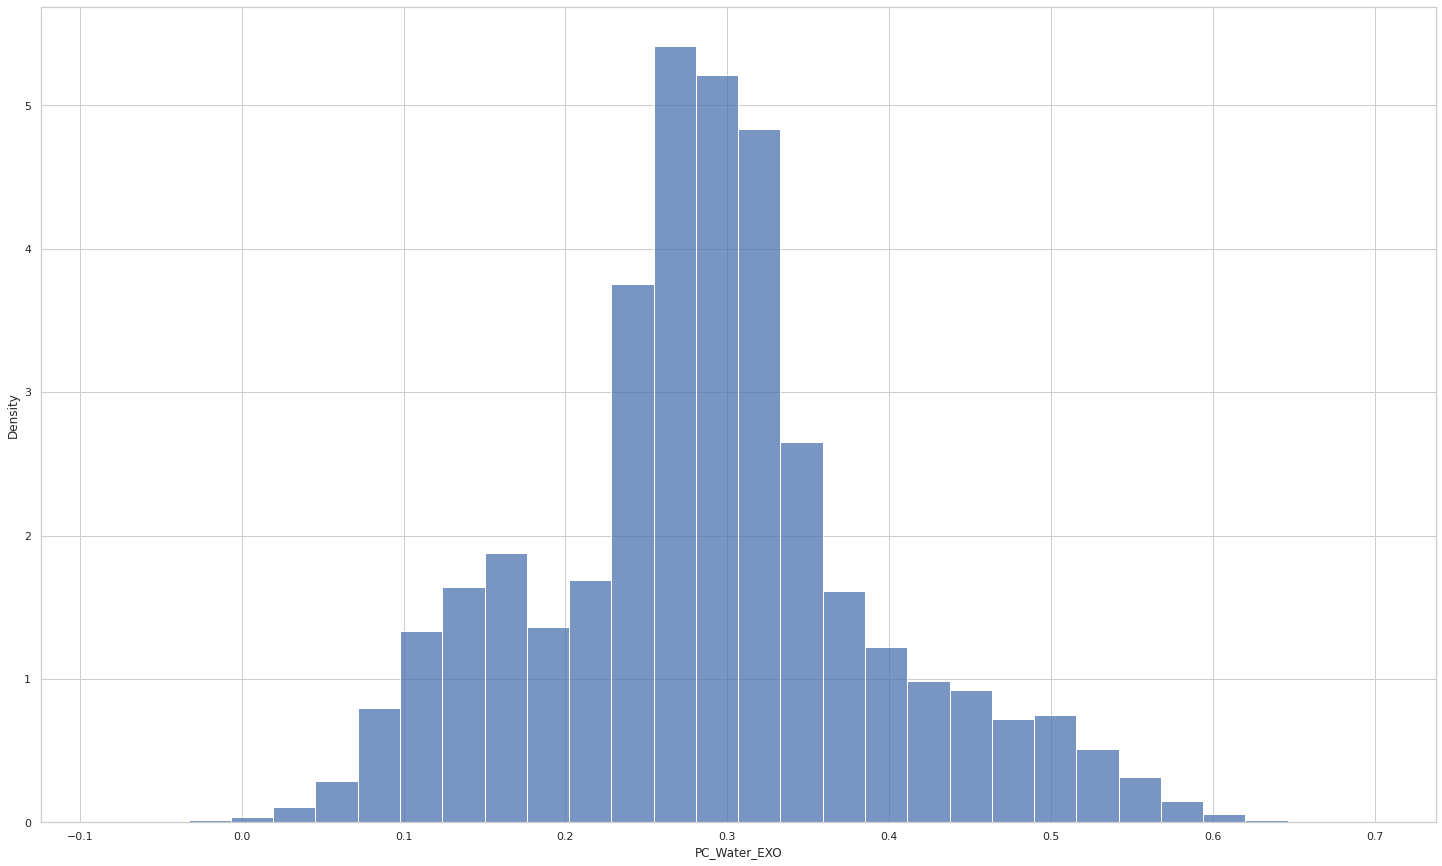

In [122]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df.query("`year`==2017"), x='PC_Water_EXO', stat='density', bins=30, palette='flare')
plt.show()

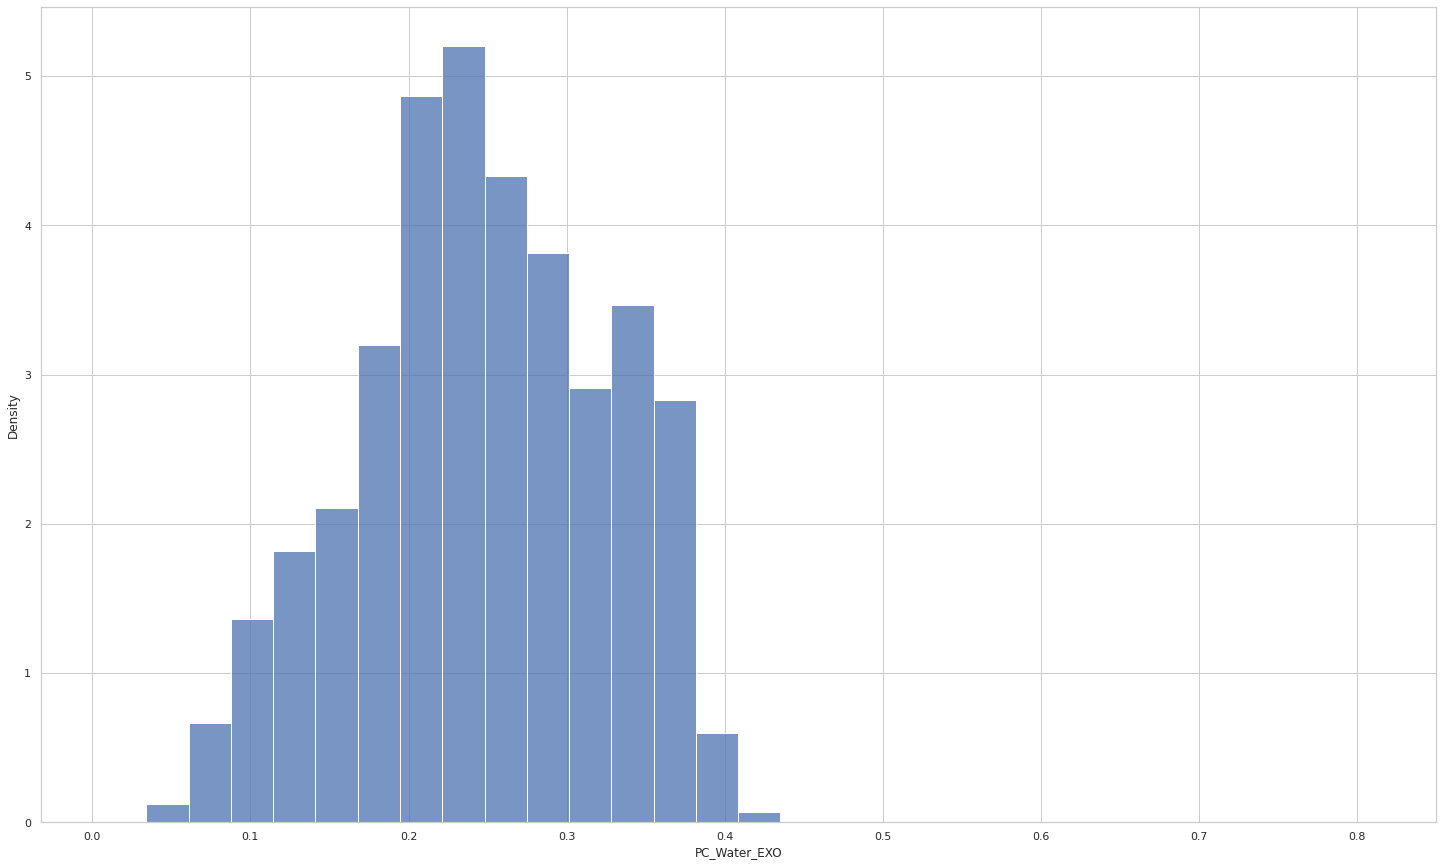

In [123]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df.query("`year`==2018"), x='PC_Water_EXO', stat='density', bins=30, palette='flare')
plt.show()

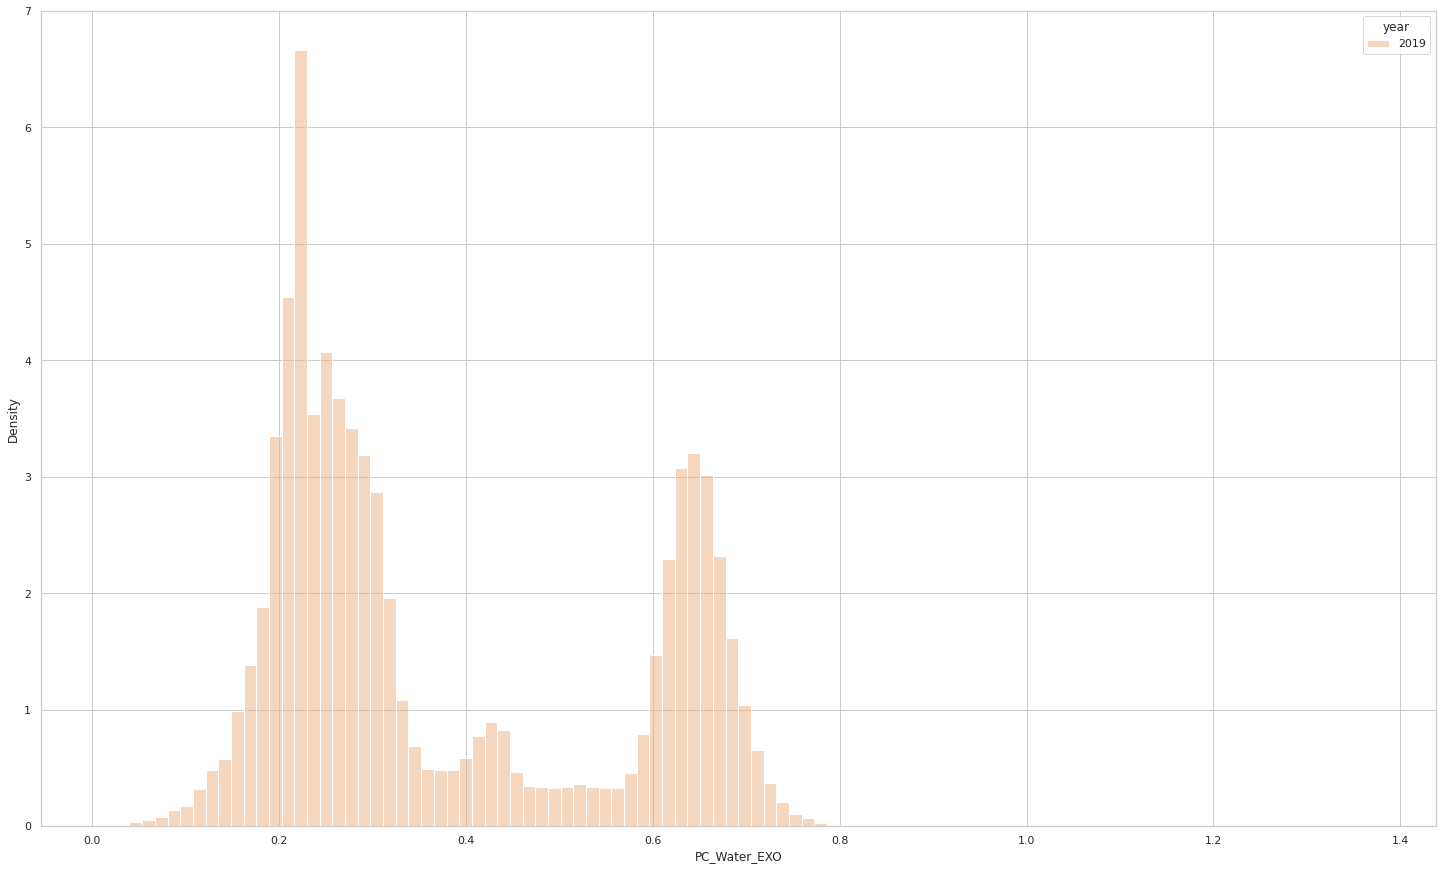

In [124]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df.query("`year`==2019"), x='PC_Water_EXO', stat='density', bins=100, hue='year', palette='flare')
plt.show()

## Observation:

1. Some `PC_Water_EXO` values are negative. We need to do some data cleaning around these values.

In [125]:
df = df.query("`PC_Water_EXO` >= 0")

In [126]:
df['PN'] = df.TP/df.TN

## Exploring the correlations

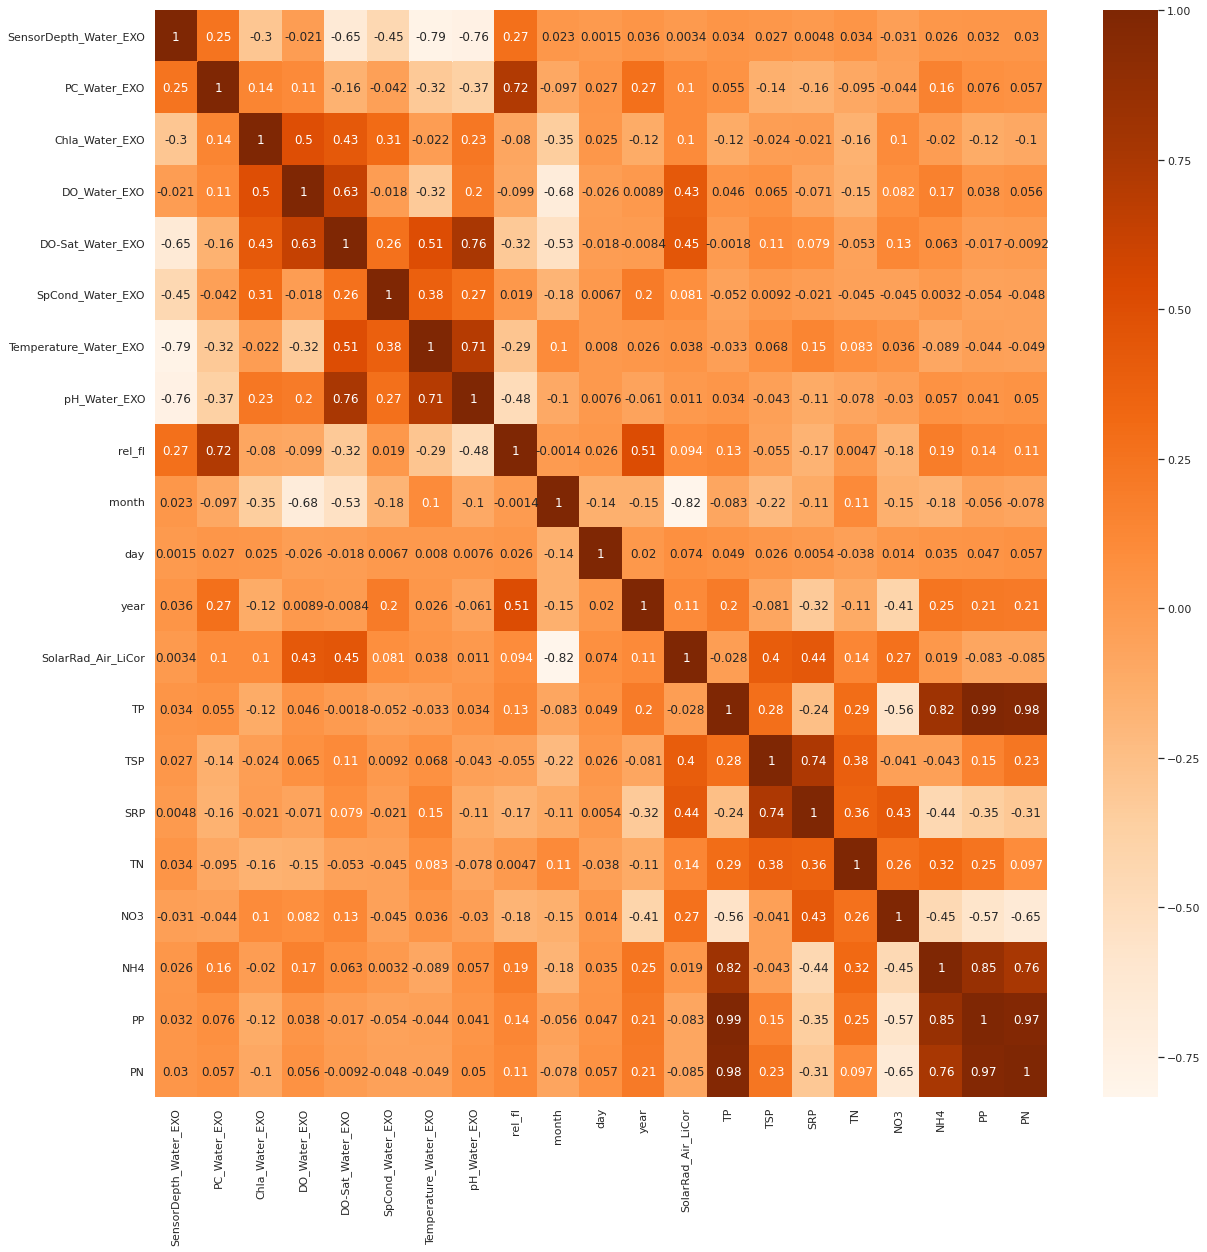

In [127]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Oranges')
plt.show()

## Observation:

Phycocyanin has good correlations with:
1. Sensor depth
2. Chlorophyl A
3. Solar Radiation
4. Dissolved Oxygen
5. pH of water (negatively)
6. Water temperature (negatively)
7. Relative fluorescence

Let's start with

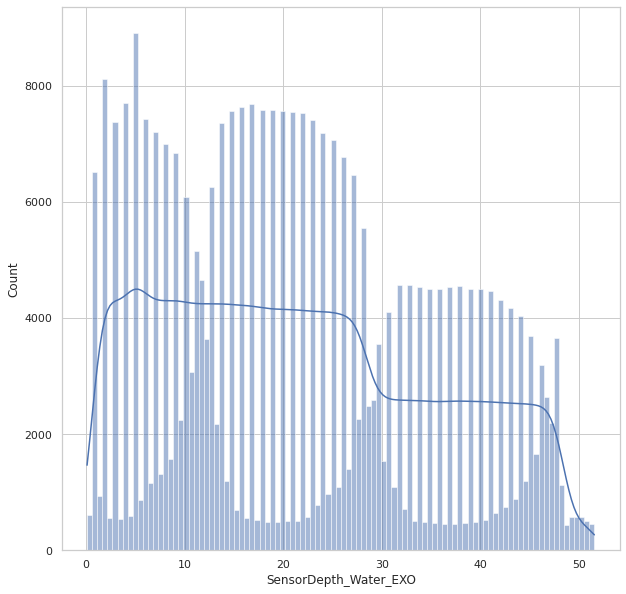

In [128]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='SensorDepth_Water_EXO', bins=100, kde=True)
plt.show()

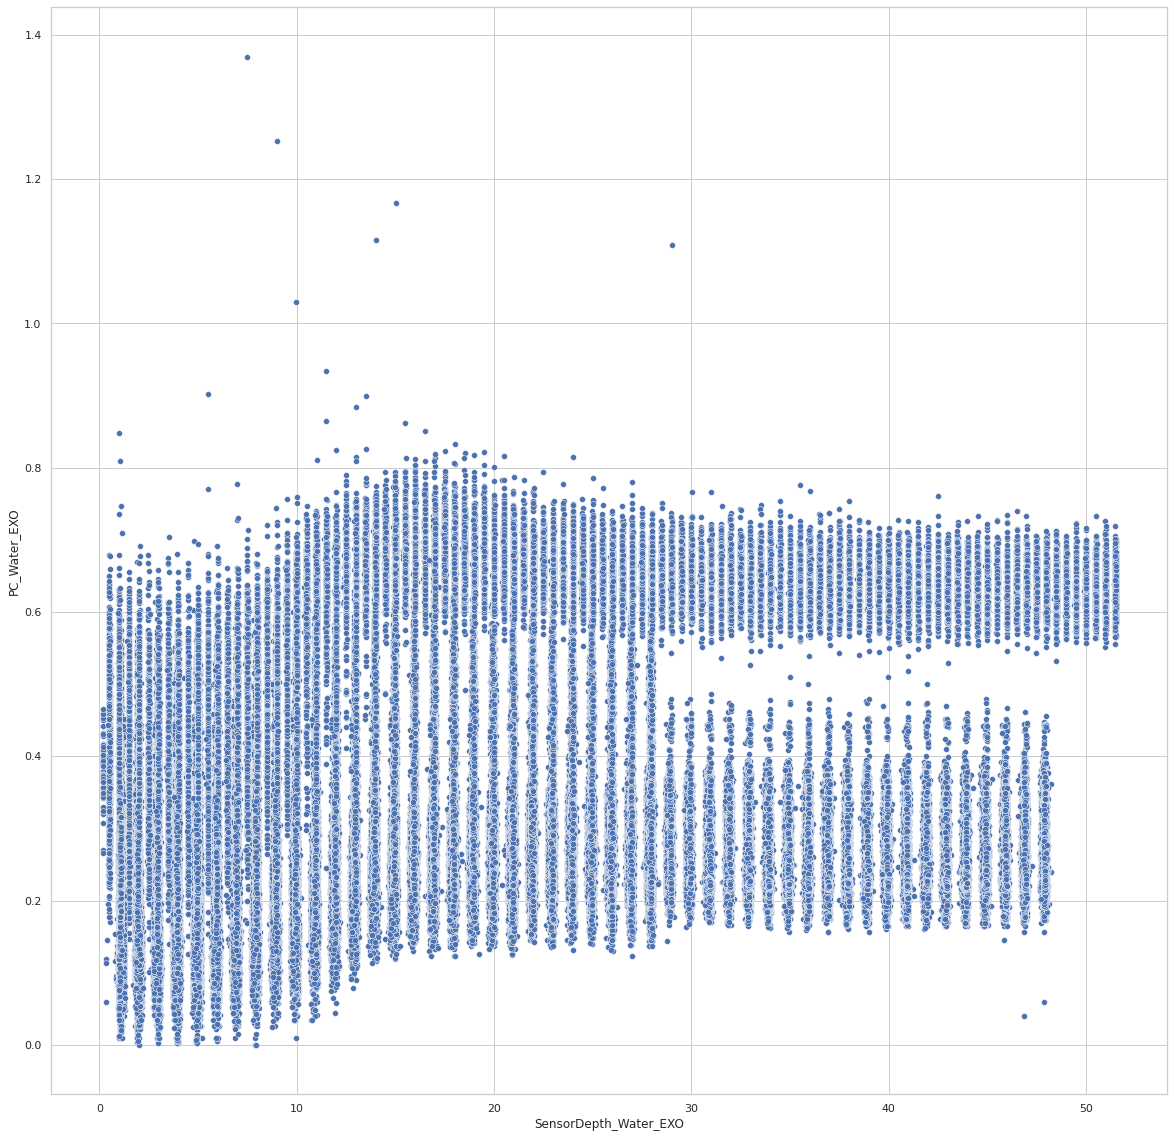

In [129]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='SensorDepth_Water_EXO', y='PC_Water_EXO')
plt.show()

## Observation

1. Phycocyanin concentrations appear to be in clusters at different levels of sensor depth.
2. There seems to be more phycocyanin concentration towards the surface and reduces at deeper depths of the lake.

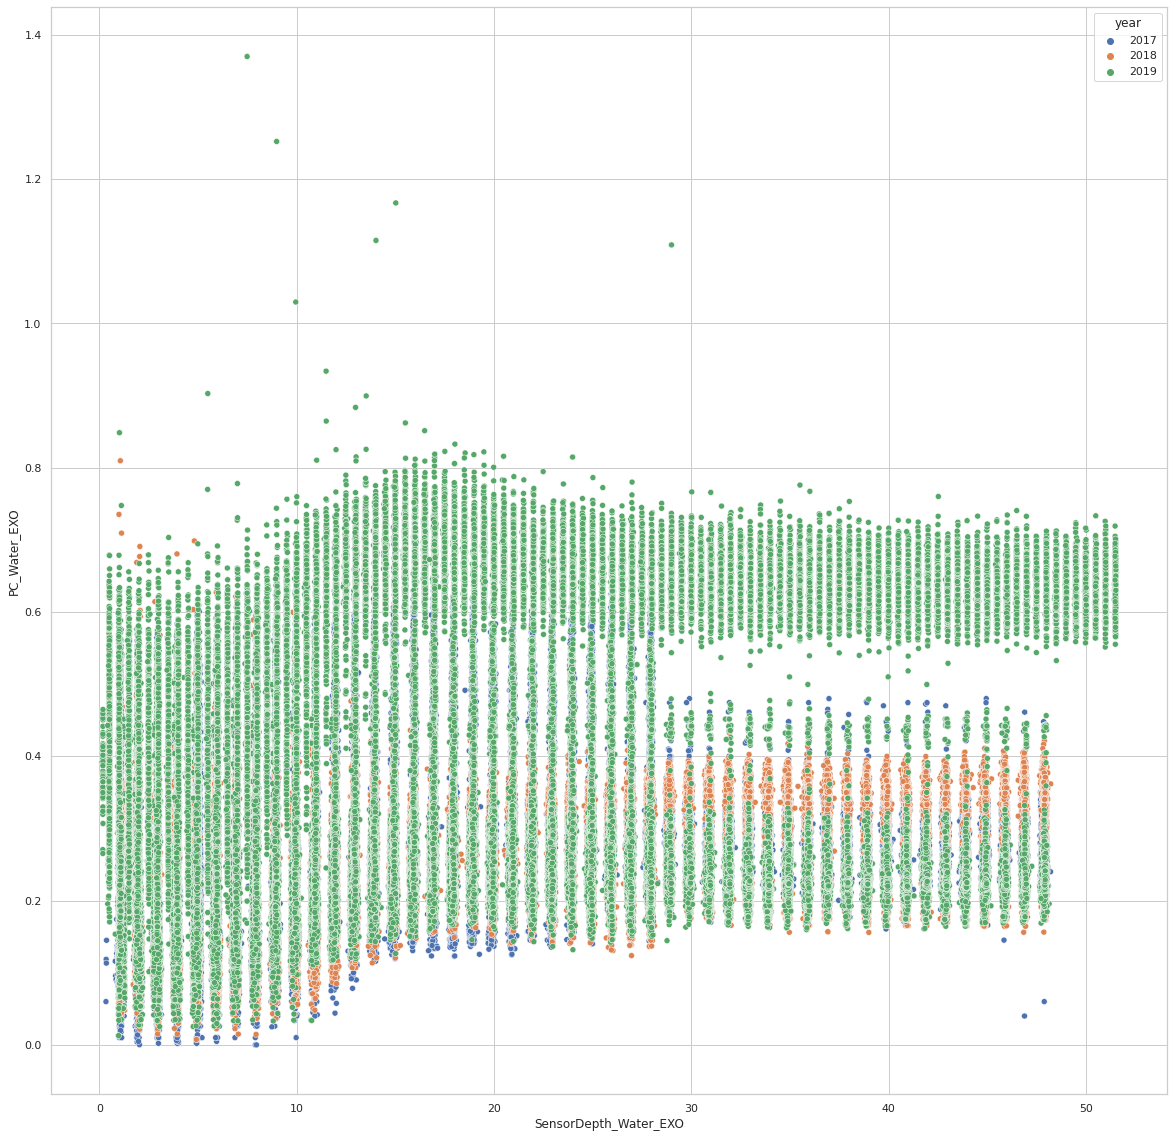

In [130]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='SensorDepth_Water_EXO', y='PC_Water_EXO', hue='year', palette='deep')
plt.show()

## Observation:

Phycocyanin level is higher in the year 2019, followed by 2017, 2018. Let's confirm this observation

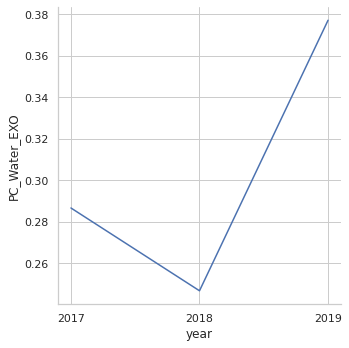

In [131]:
mean_pc_by_yr = df.groupby('year', as_index=False)['PC_Water_EXO'].mean()
mean_pc_by_yr.year = mean_pc_by_yr.year.astype('str')
sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

### Need to explore what changed from 2017 to 2018 and did the factors reverse from 2018 to 2019?

In [132]:
df.columns

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PN'],
      dtype='object')

In [133]:
df_mean = df.groupby('year', as_index=False)[['PC_Water_EXO', 'Chla_Water_EXO',
                                              'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
                                              'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl',
                                              'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4', 'PP', 'PN']].mean()

df_mean.year = df_mean.year.astype('str')
df_mean.head()

,year,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,SolarRad_Air_LiCor,TP,TSP,SRP,TN,NO3,NH4,PP,PN
0,2017,0.286553,1.826674,10.129781,93.689220,140.482876,11.099639,7.471491,1.358089,190.239819,10.979225,5.803439,4.345837,0.508051,0.380237,0.006792,5.175787,21.845607
1,2018,0.246642,2.349001,10.533959,95.341475,143.578668,11.313672,7.422336,1.248319,181.204093,12.848301,6.284546,4.316395,0.489682,0.278849,0.007070,6.563755,26.753805
2,2019,0.377043,1.498548,10.185903,93.537137,142.489706,11.429975,7.424284,2.075108,204.334138,15.077052,5.621447,3.508522,0.488017,0.276531,0.009782,9.455605,29.718899


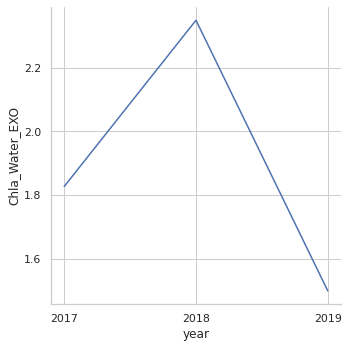

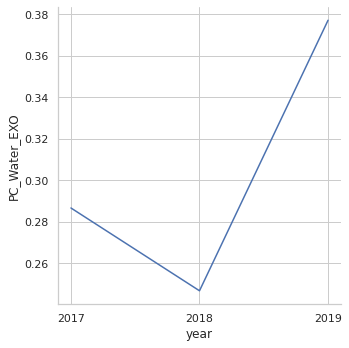

In [134]:
sns.relplot(data=df_mean, x='year', y='Chla_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

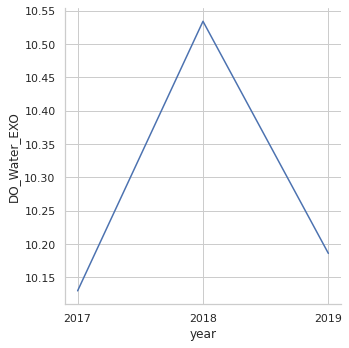

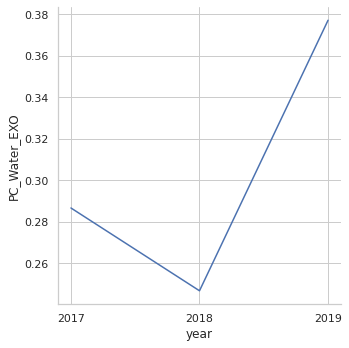

In [135]:
sns.relplot(data=df_mean, x='year', y='DO_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

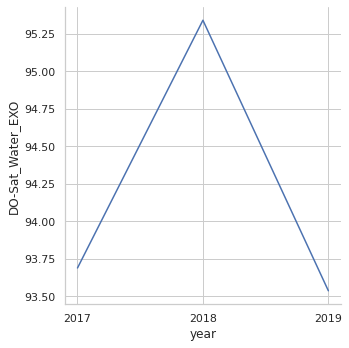

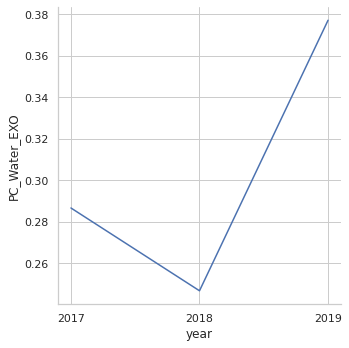

In [136]:
sns.relplot(data=df_mean, x='year', y='DO-Sat_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

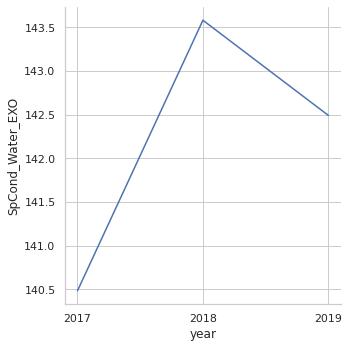

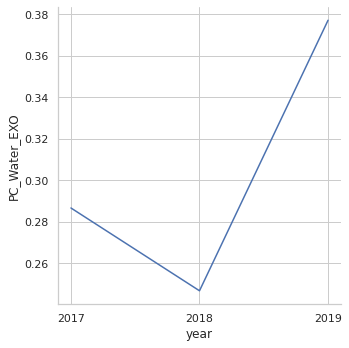

In [137]:
sns.relplot(data=df_mean, x='year', y='SpCond_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

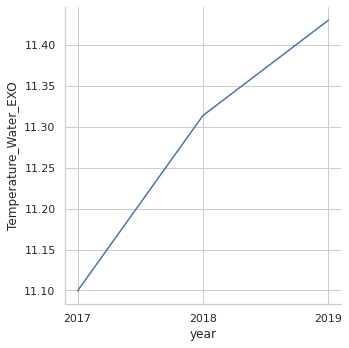

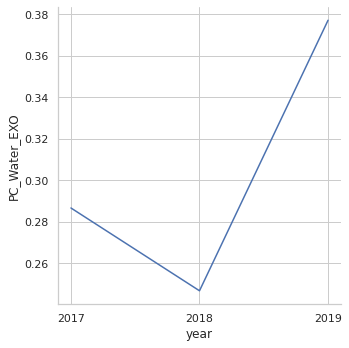

In [138]:
sns.relplot(data=df_mean, x='year', y='Temperature_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

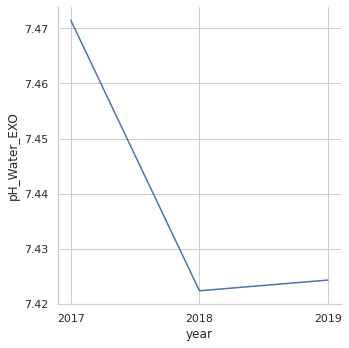

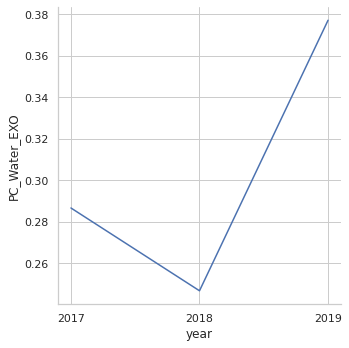

In [139]:
sns.relplot(data=df_mean, x='year', y='pH_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

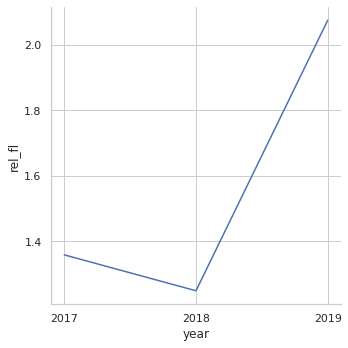

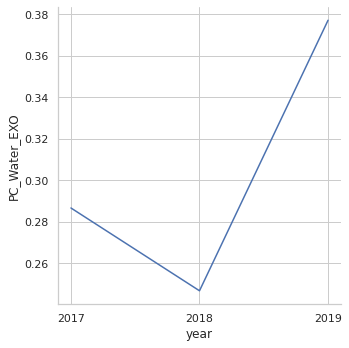

In [140]:
sns.relplot(data=df_mean, x='year', y='rel_fl', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

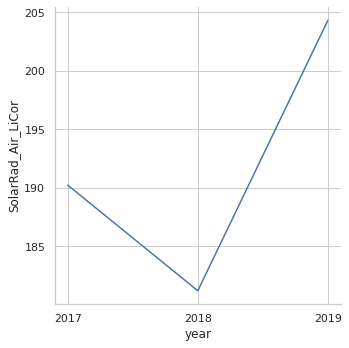

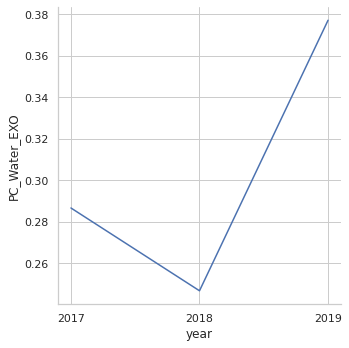

In [141]:
sns.relplot(data=df_mean, x='year', y='SolarRad_Air_LiCor', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

## Seasonal exploration

1. Spring - March to May.
2. Summer - June to August.
3. Autumn - September to November.
4. Winter - December to February.


In [142]:
def month_to_season(month: int) -> int:
    if month >= 3 and month <= 5:
        return 1
    if month >= 6 and month <= 8:
        return 2
    if month >= 9 and month <= 11:
        return 3
    return 4

In [143]:
df['season'] = df.month.map(month_to_season)

In [144]:
df.columns

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PN', 'season'],
      dtype='object')

In [145]:
season_str = {
    1: 'spring',
    2: 'summer',
    3: 'autumn',
    4: 'winter'
}

df_season_mean = df.groupby('season', as_index=False)[['PC_Water_EXO', 'Chla_Water_EXO',
                                                       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
                                                       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl',
                                                       'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
                                                       'PP', 'PN']].mean()

df_season_mean['season_str'] = df_season_mean.season.map(lambda x: season_str[x])

In [146]:
df_season_mean

,season,PC_Water_EXO,Chla_Water_EXO,DO_Water_EXO,DO-Sat_Water_EXO,SpCond_Water_EXO,Temperature_Water_EXO,pH_Water_EXO,rel_fl,SolarRad_Air_LiCor,TP,TSP,SRP,TN,NO3,NH4,PP,PN,season_str
0,1,0.313404,3.859129,12.481127,105.163891,144.665307,7.773252,7.580337,1.308594,202.275106,7.716428,4.845299,3.118795,0.385582,0.320261,0.006428,2.871129,20.601729,spring
1,2,0.335051,1.768587,10.576554,97.772324,142.146137,11.646424,7.435145,1.729125,237.293416,13.688185,6.220441,4.269831,0.505094,0.314266,0.008933,7.467743,26.535297,summer
2,3,0.283226,1.398627,9.181904,85.379332,141.518771,11.666963,7.405912,1.568591,124.544336,13.892157,5.521289,3.771435,0.501289,0.306549,0.007061,8.370868,28.133014,autumn
3,4,0.286418,2.002778,10.159874,85.938048,139.687474,8.019510,7.605566,1.384964,47.665465,7.182450,4.131000,2.121750,0.590287,0.183300,0.012925,3.051450,12.167715,winter


### Phosphorus:Nitrogen ratio and Phycocyanin

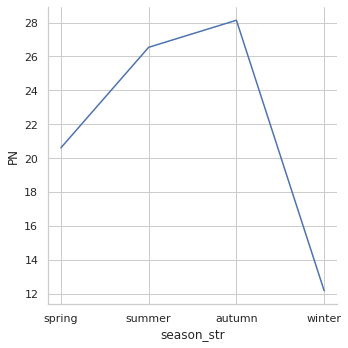

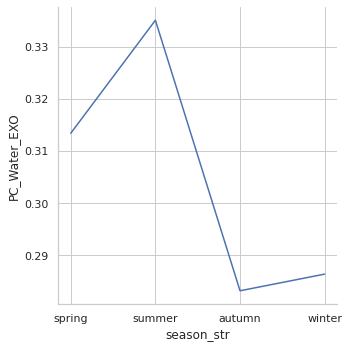

In [147]:
sns.relplot(data=df_season_mean, x='season_str', y='PN', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Chlorophyll-a and Phycocyanin

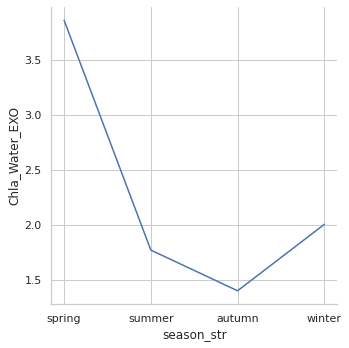

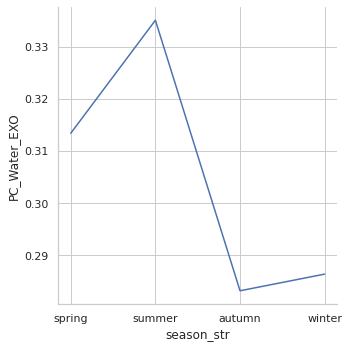

In [148]:
sns.relplot(data=df_season_mean, x='season_str', y='Chla_Water_EXO', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Dissolved Oxygen & Phycocyanin

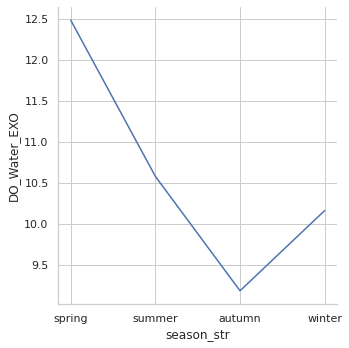

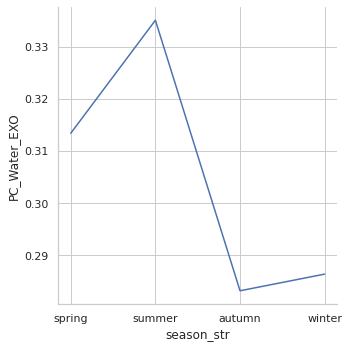

In [149]:
sns.relplot(data=df_season_mean, x='season_str', y='DO_Water_EXO', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Dissolved Oxygen Saturation & Phycocyanin

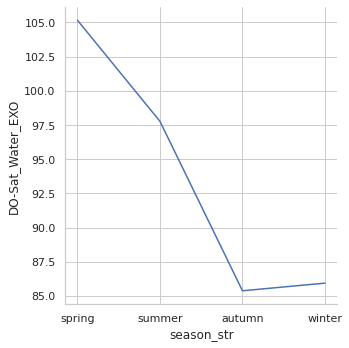

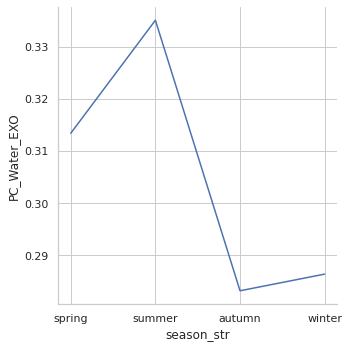

In [150]:
sns.relplot(data=df_season_mean, x='season_str', y='DO-Sat_Water_EXO', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Specific Conductance & Phycocyanin

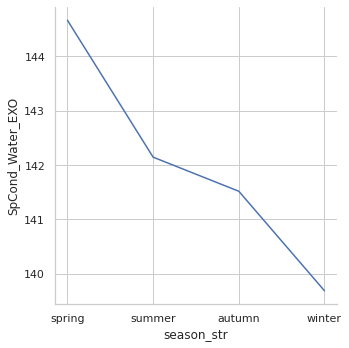

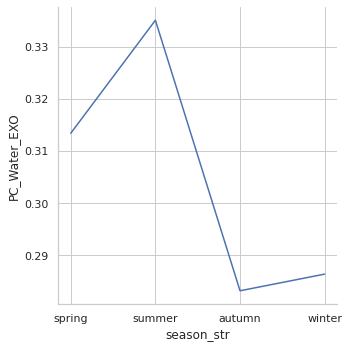

In [151]:
sns.relplot(data=df_season_mean, x='season_str', y='SpCond_Water_EXO', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Water temperature & Phycocyanin

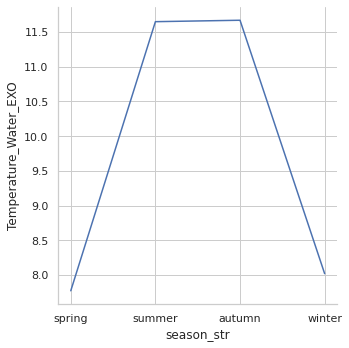

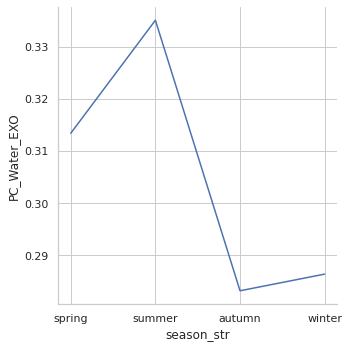

In [152]:
sns.relplot(data=df_season_mean, x='season_str', y='Temperature_Water_EXO', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### pH & Phycocyanin

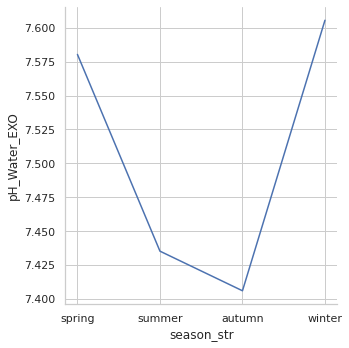

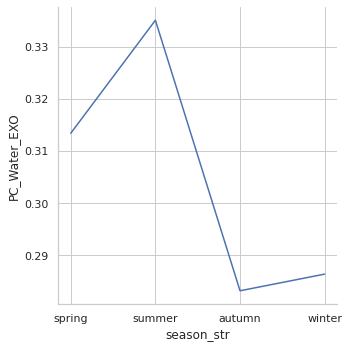

In [153]:
sns.relplot(data=df_season_mean, x='season_str', y='pH_Water_EXO', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Relative fluorescence & Phycocyanin

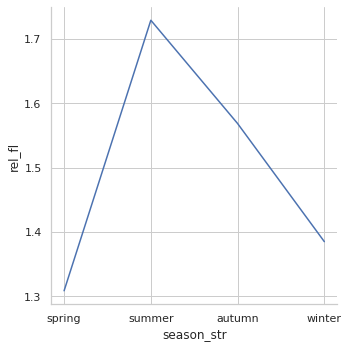

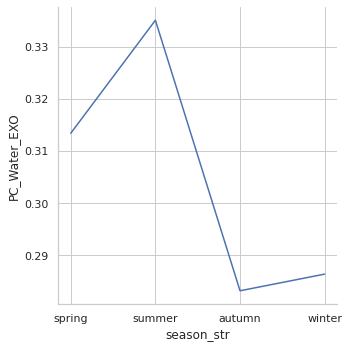

In [154]:
sns.relplot(data=df_season_mean, x='season_str', y='rel_fl', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Solar Radiation & Phycocyanin

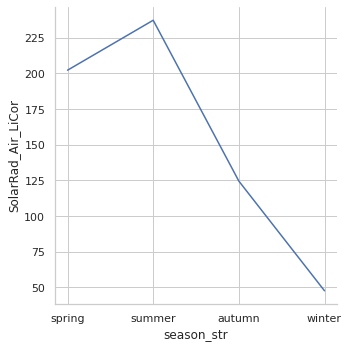

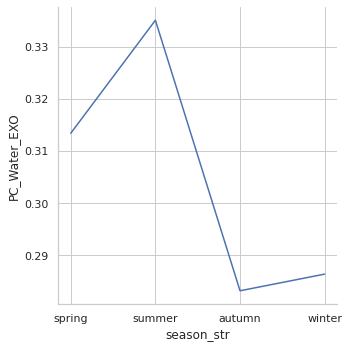

In [155]:
sns.relplot(data=df_season_mean, x='season_str', y='SolarRad_Air_LiCor', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

### Total Phosphorus & Phycocyanin

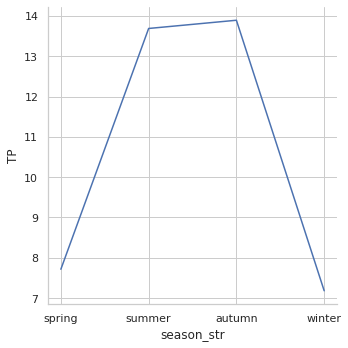

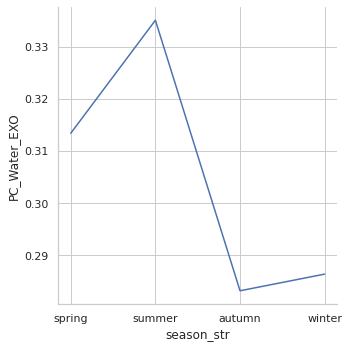

In [156]:
sns.relplot(data=df_season_mean, x='season_str', y='TP', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

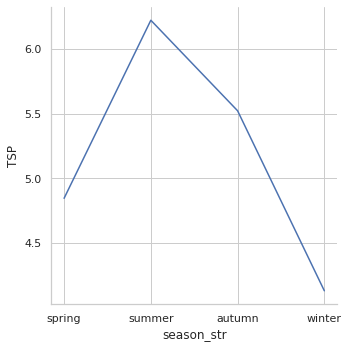

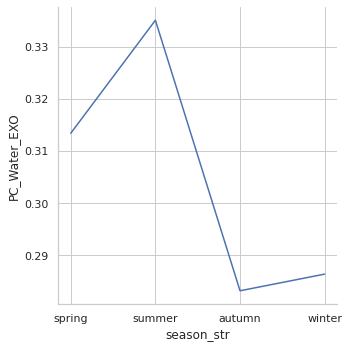

In [157]:
sns.relplot(data=df_season_mean, x='season_str', y='TSP', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

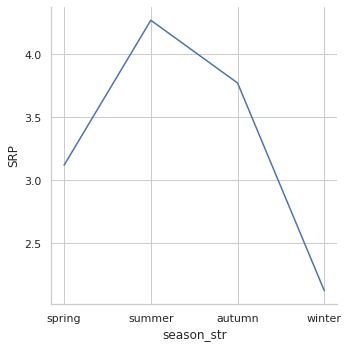

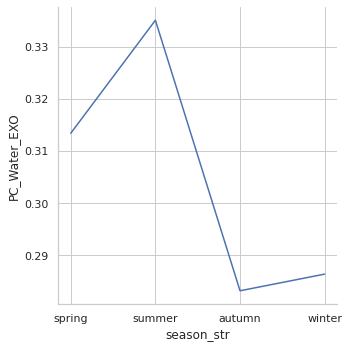

In [158]:
sns.relplot(data=df_season_mean, x='season_str', y='SRP', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

## Observation:

`TSP` and `SRP` are directly proportional

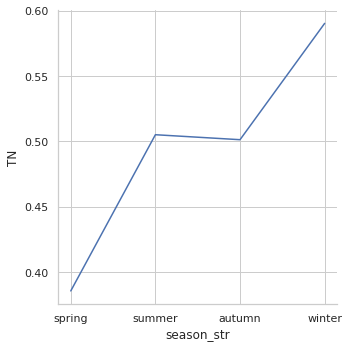

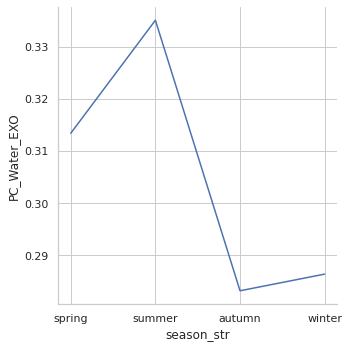

In [159]:
sns.relplot(data=df_season_mean, x='season_str', y='TN', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

## Observation:

Nitrogen is directly proportional to Phycocyanin

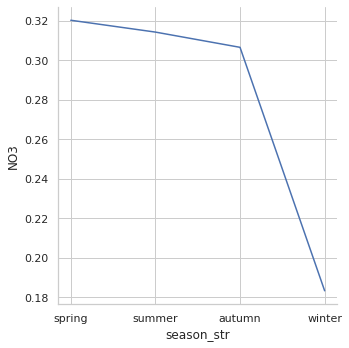

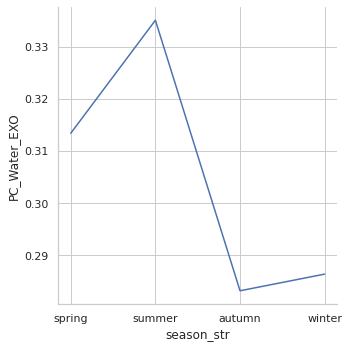

In [160]:
sns.relplot(data=df_season_mean, x='season_str', y='NO3', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

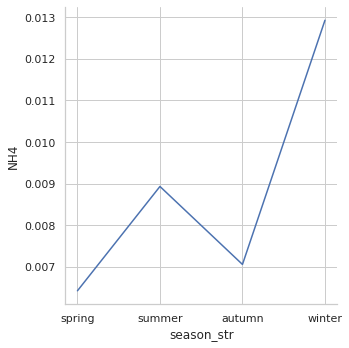

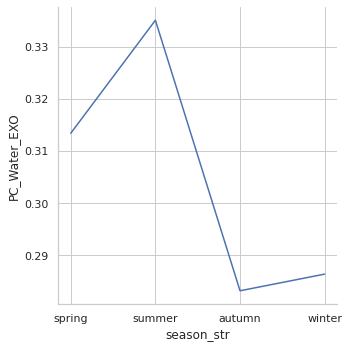

In [161]:
sns.relplot(data=df_season_mean, x='season_str', y='NH4', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

## Observation:

Ammonium is directly proportional to Phycocyanin

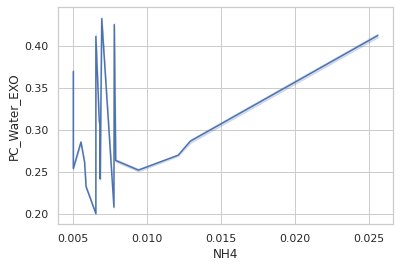

In [162]:
sns.lineplot(data=df[['PC_Water_EXO', 'NH4']], x='NH4', y='PC_Water_EXO')
plt.show()

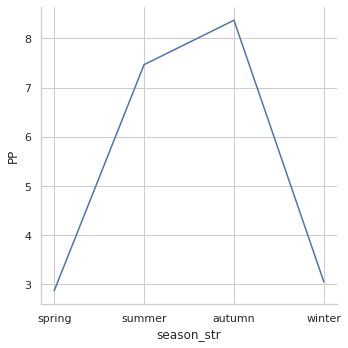

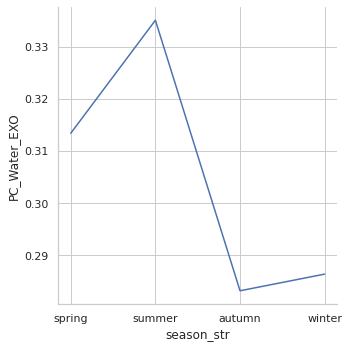

In [163]:
sns.relplot(data=df_season_mean, x='season_str', y='PP', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

## Analysis of relation between Phycocyanin and stratification

In [164]:
df.columns

Index(['DateTime', 'SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PN', 'season'],
      dtype='object')

In [165]:
len(df.SensorDepth_Water_EXO.unique())

8932

In [166]:
depth_df = df.groupby(['SensorDepth_Water_EXO'], as_index=False)['PC_Water_EXO', 'Temperature_Water_EXO'].mean()

/home/achara/achara_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [167]:
depth_df.SensorDepth_Water_EXO.describe()

count    8932.000000
mean       24.631291
std        14.538678
min         0.120000
25%        12.015750
50%        24.016500
75%        37.003250
max        51.546000
Name: SensorDepth_Water_EXO, dtype: float64

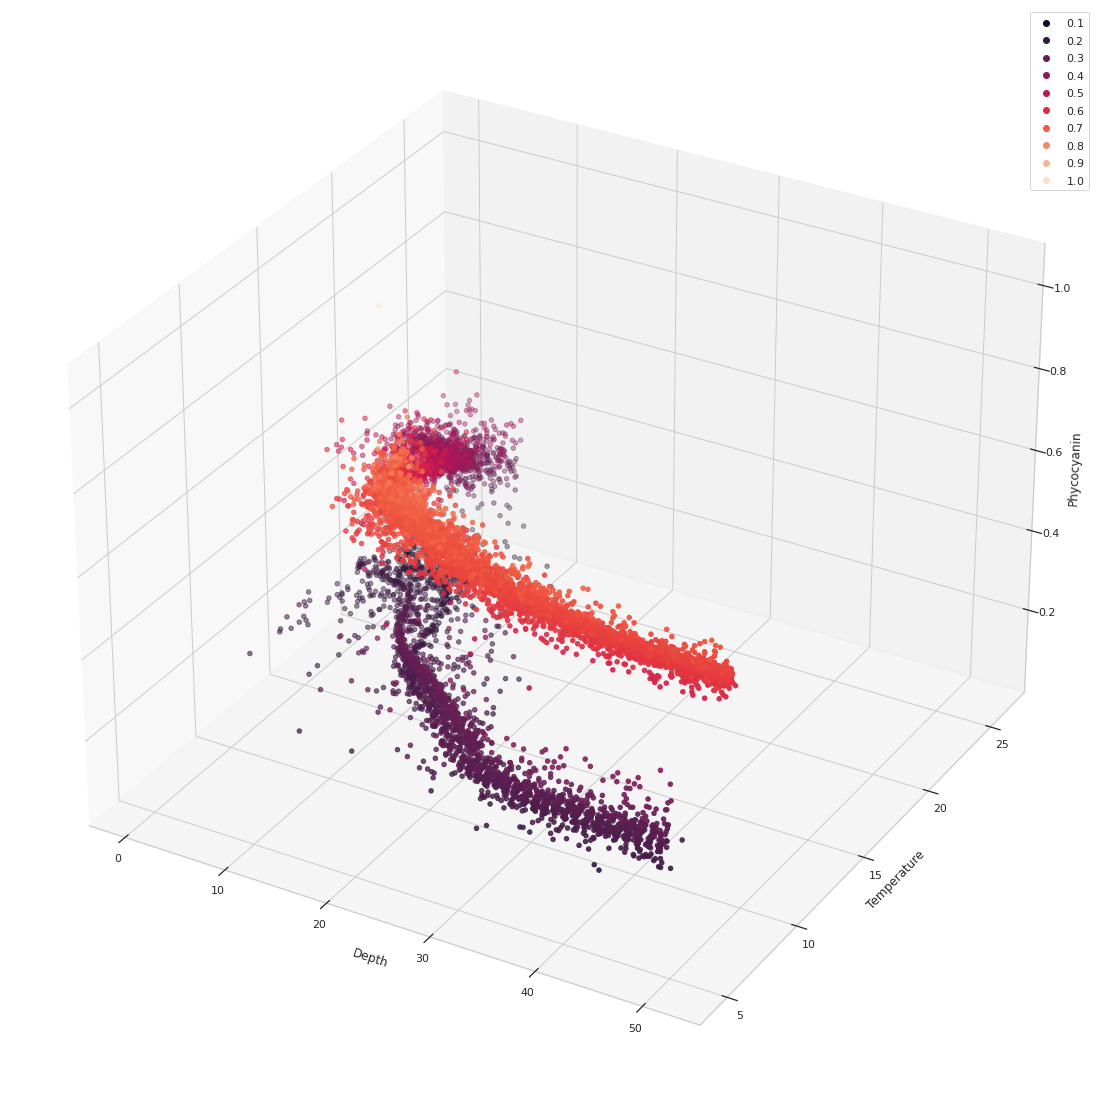

In [168]:
plt.figure(figsize=(20, 20))
plot_axes = plt.axes(projection = '3d')
plot_axes.set_xlabel('Depth')
plot_axes.set_ylabel('Temperature')
plot_axes.set_zlabel('Phycocyanin')
sc = plot_axes.scatter3D(depth_df.SensorDepth_Water_EXO, depth_df.Temperature_Water_EXO, depth_df.PC_Water_EXO, c=depth_df.PC_Water_EXO)

plt.legend(*sc.legend_elements())
plt.show()

### Observation:
Phycocyanin concentration reduces with temperature and depth. Ideal range of temperature appears to be between 20 - 25